In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Amazon Sale Report.csv')

<ipython-input-2-056aaa6327c3>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


In [ ]:
df.shape

(128975, 24)

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.Status.unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [ ]:
df['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [ ]:
len(df['ship-state'].unique())

70

In [ ]:
df['ship-state'] = df['ship-state'].str.lower()

In [ ]:
len(df['ship-state'].unique())

48

In [ ]:
df['ship-state'].unique()

array(['maharashtra', 'karnataka', 'puducherry', 'tamil nadu',
       'uttar pradesh', 'chandigarh', 'telangana', 'andhra pradesh',
       'rajasthan', 'delhi', 'haryana', 'assam', 'jharkhand',
       'chhattisgarh', 'odisha', 'kerala', 'madhya pradesh',
       'west bengal', 'nagaland', 'gujarat', 'uttarakhand', 'bihar',
       'jammu & kashmir', 'punjab', 'himachal pradesh',
       'arunachal pradesh', 'manipur', 'goa', 'meghalaya', 'tripura',
       'ladakh', 'dadra and nagar', 'sikkim', nan, 'andaman & nicobar ',
       'rajshthan', 'nl', 'mizoram', 'new delhi',
       'punjab/mohali/zirakpur', 'rj', 'orissa', 'lakshadweep', 'pb',
       'apo', 'ar', 'pondicherry', 'rajsthan'], dtype=object)

In [ ]:
df['ship-state'] = df['ship-state'].str.replace('rj','rajasthan')
df['ship-state'] = df['ship-state'].str.replace('pb','punjab')
df['ship-state'] = df['ship-state'].str.replace('punjab/mohali/zirakpur','punjab')
df['ship-state'] = df['ship-state'].str.replace('nl','nagaland')
df['ship-state'] = df['ship-state'].str.replace('new delhi','delhi')
df['ship-state'] = df['ship-state'].str.strip()
df['ship-state'] = df['ship-state'].str.replace('rajshthan','rajasthan')

In [ ]:
len(df['ship-state'].unique())

42

In [ ]:
df['ship-state'].unique()

array(['maharashtra', 'karnataka', 'puducherry', 'tamil nadu',
       'uttar pradesh', 'chandigarh', 'telangana', 'andhra pradesh',
       'rajasthan', 'delhi', 'haryana', 'assam', 'jharkhand',
       'chhattisgarh', 'odisha', 'kerala', 'madhya pradesh',
       'west bengal', 'nagaland', 'gujarat', 'uttarakhand', 'bihar',
       'jammu & kashmir', 'punjab', 'himachal pradesh',
       'arunachal pradesh', 'manipur', 'goa', 'meghalaya', 'tripura',
       'ladakh', 'dadra and nagar', 'sikkim', nan, 'andaman & nicobar',
       'mizoram', 'orissa', 'lakshadweep', 'apo', 'ar', 'pondicherry',
       'rajsthan'], dtype=object)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

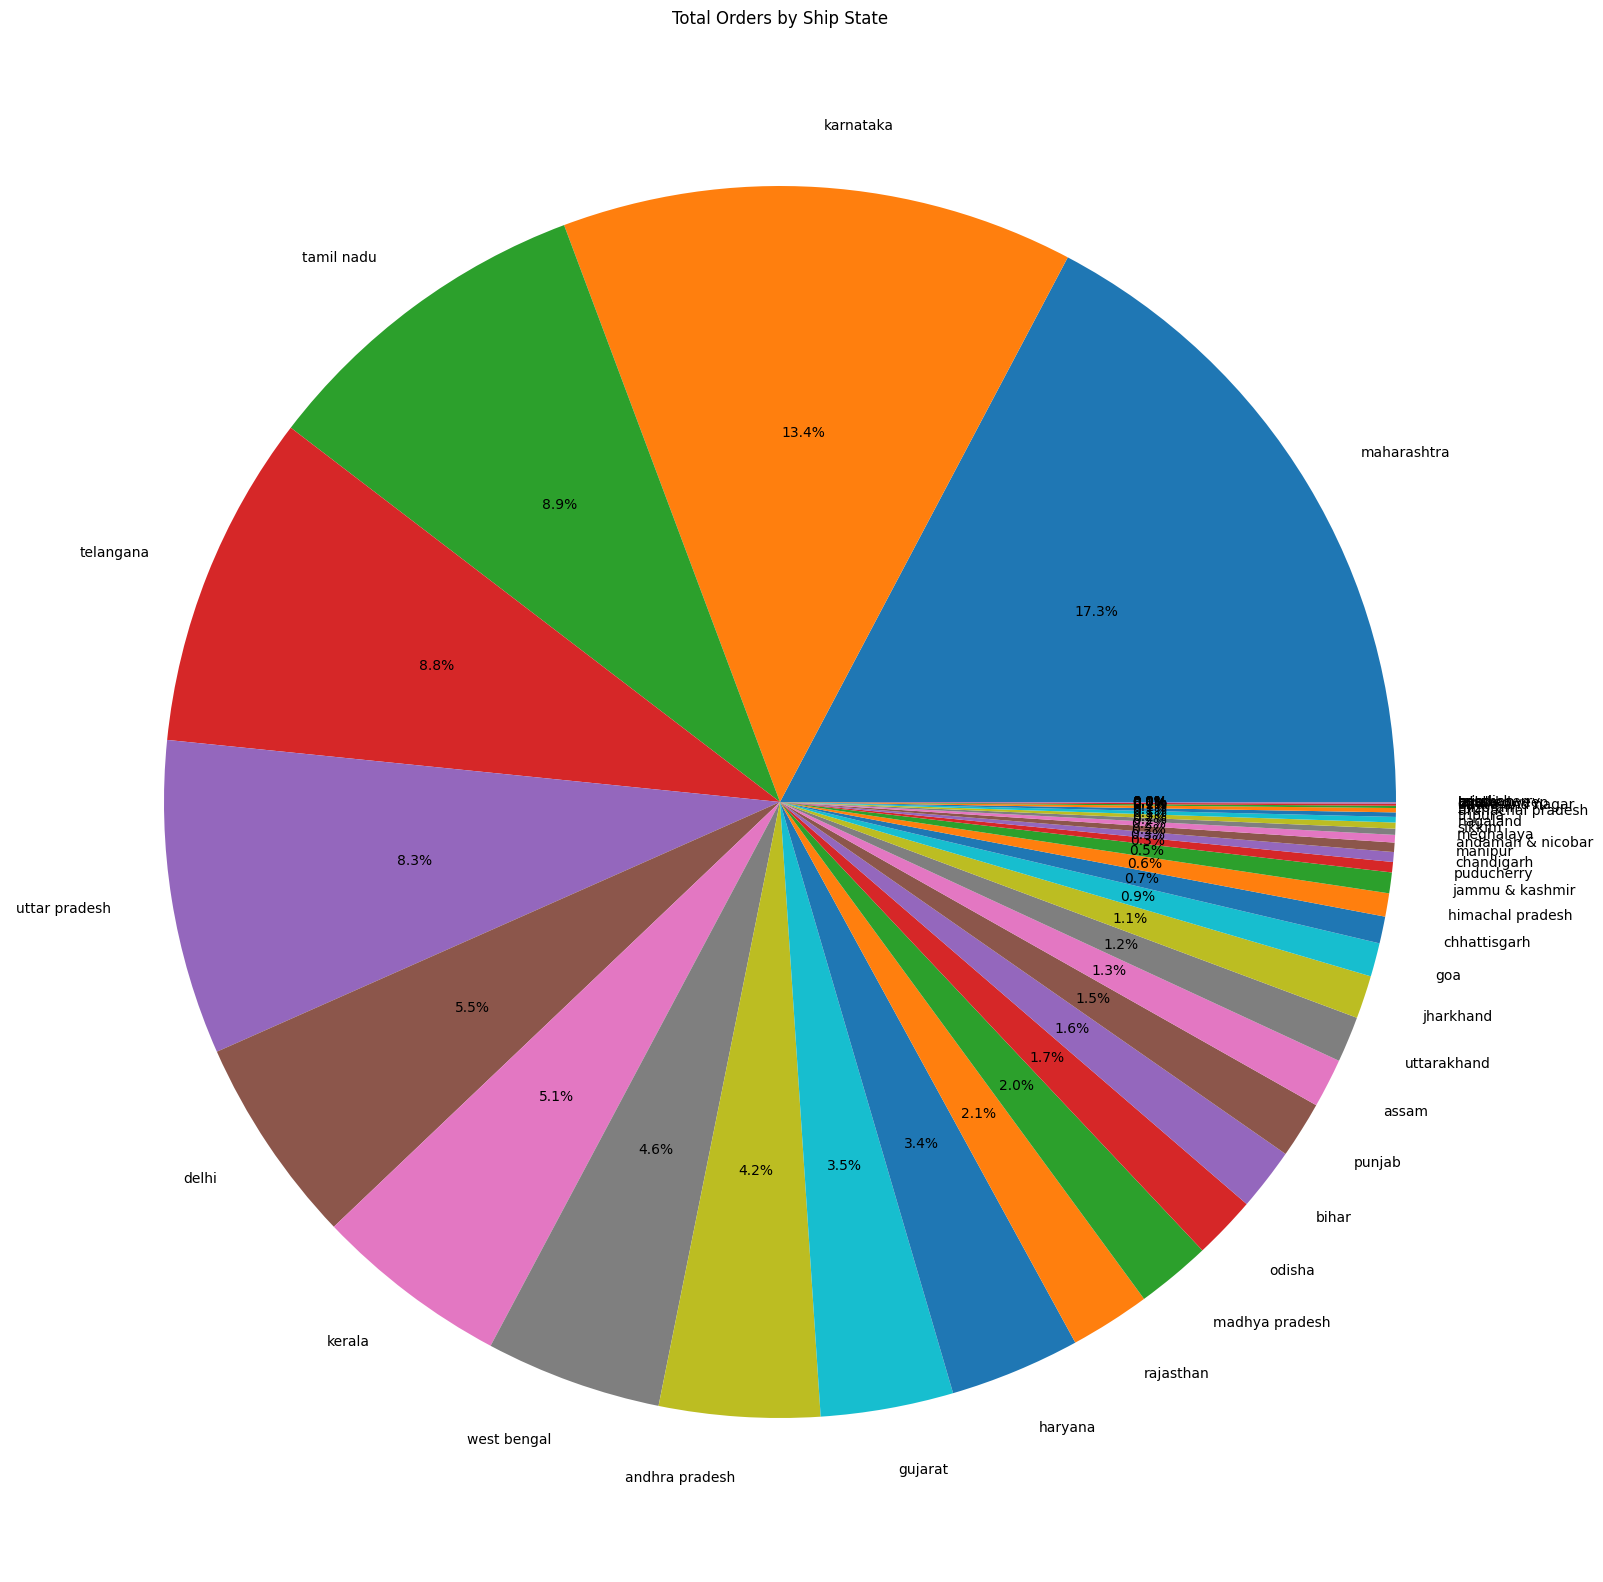

In [ ]:
state_wise_orders = df.groupby('ship-state')['Order ID'].count().sort_values(ascending=False)
plt.figure(figsize=(20,20))
plt.pie(state_wise_orders.values, labels=state_wise_orders.index, autopct='%1.1f%%')
plt.title('Total Orders by Ship State')
plt.show()

In [ ]:
df.Status.unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

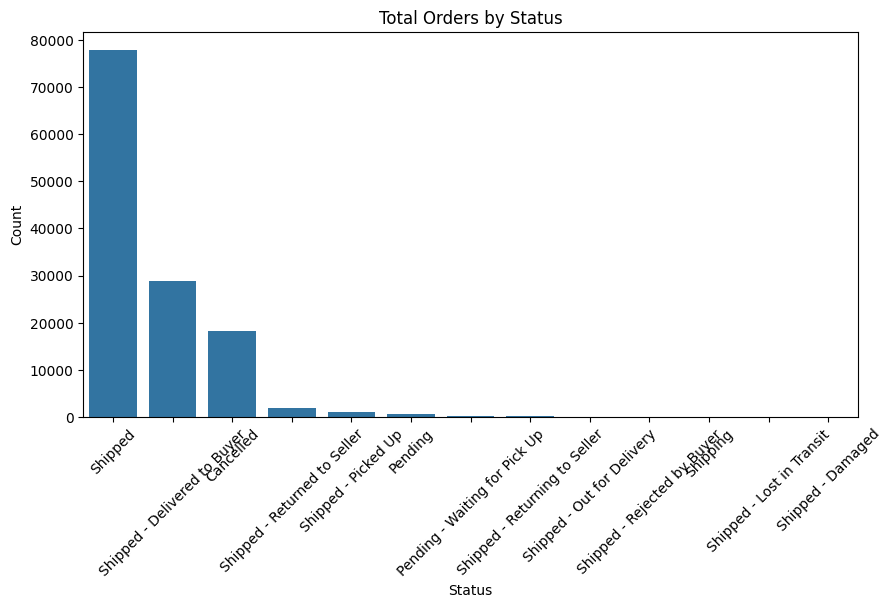

In [ ]:
status_wise_orders = df.groupby('Status')['Order ID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=status_wise_orders.index, y=status_wise_orders.values)
plt.title('Total Orders by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


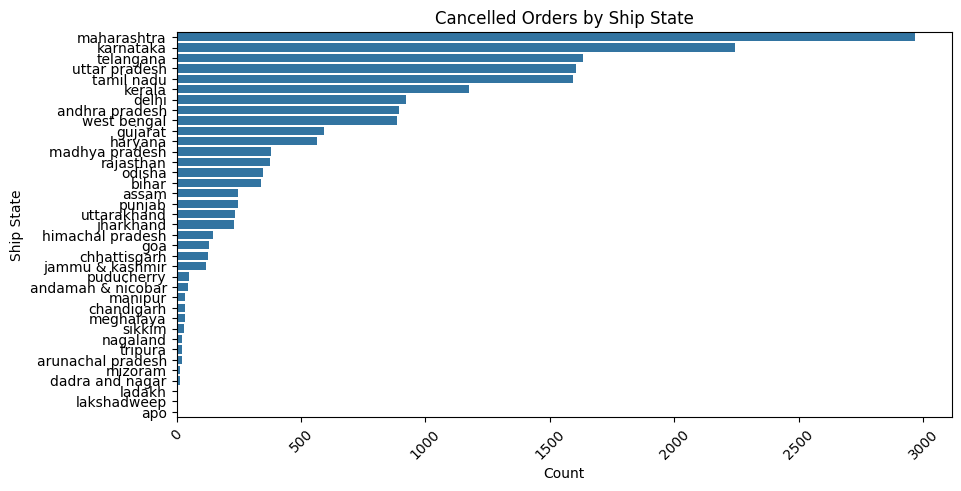

In [ ]:
cancelled_orders = df[df['Status'] == 'Cancelled']
state_wise_cancelled_orders = cancelled_orders.groupby('ship-state')['Order ID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(y=state_wise_cancelled_orders.index, x=state_wise_cancelled_orders.values)
plt.title('Cancelled Orders by Ship State')
plt.ylabel('Ship State')
plt.xlabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.Category.unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

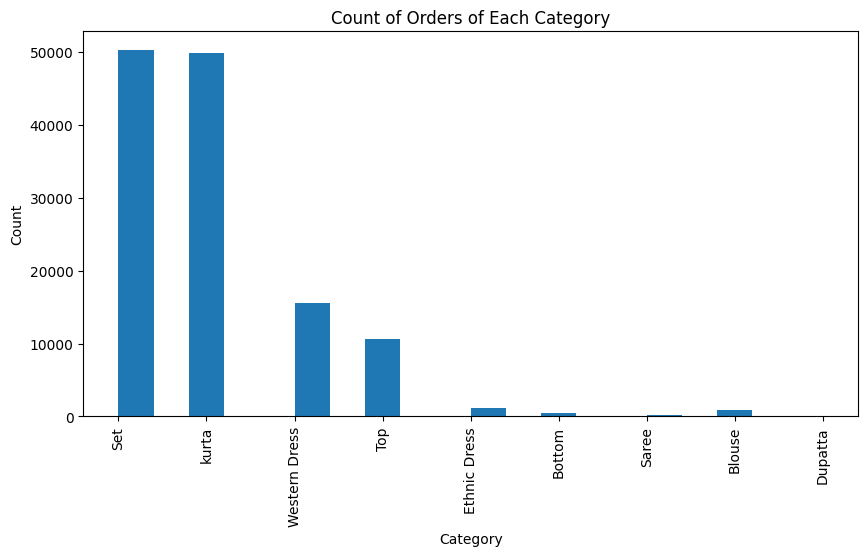

In [ ]:
category_wise_orders = df.groupby('Category')['Order ID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.hist(df['Category'], bins=20)
plt.title('Count of Orders of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

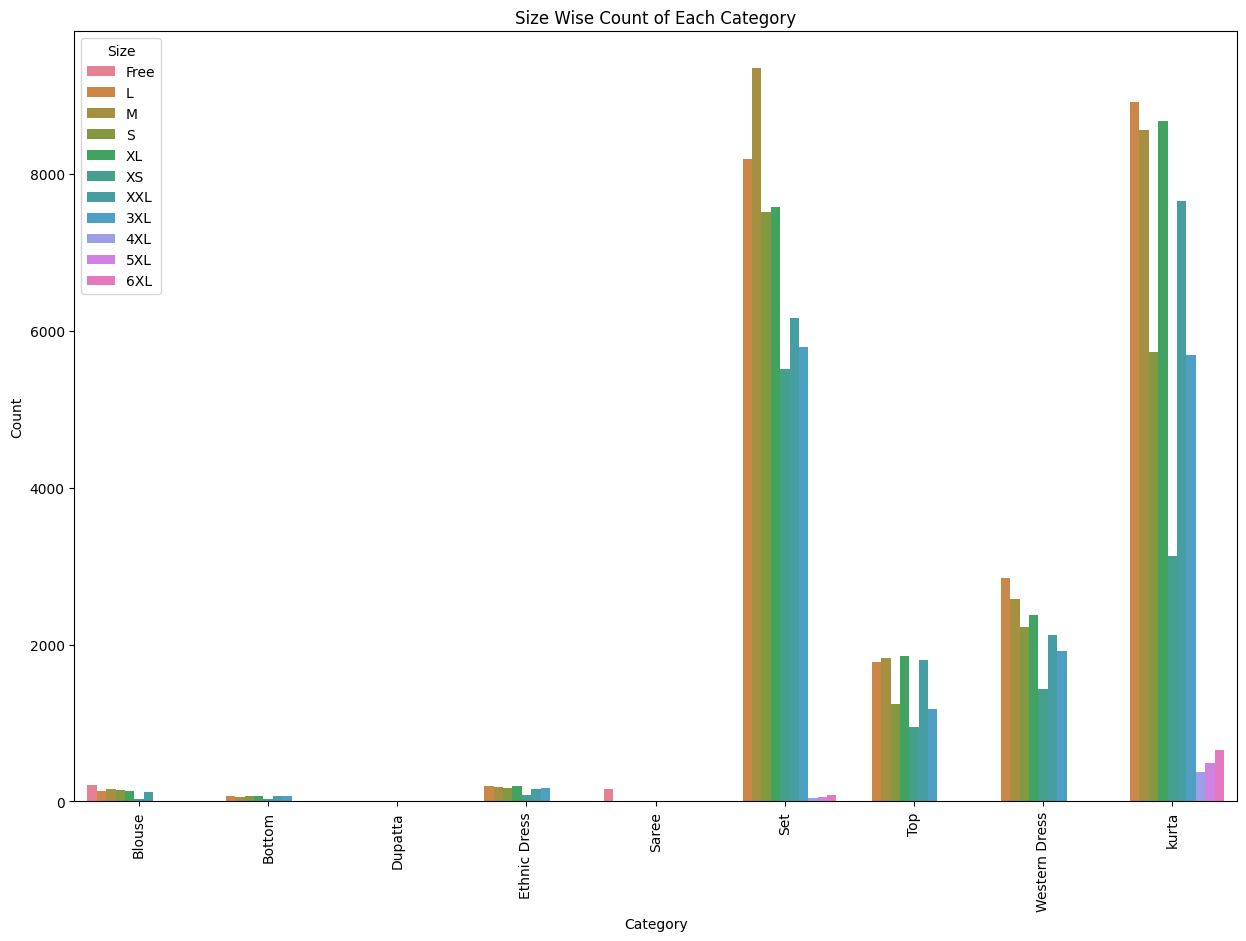

In [ ]:
size_wise_count = df.groupby(['Category', 'Size'])['Order ID'].count().reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Category', y='Order ID', hue='Size', data=size_wise_count)
plt.title('Size Wise Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


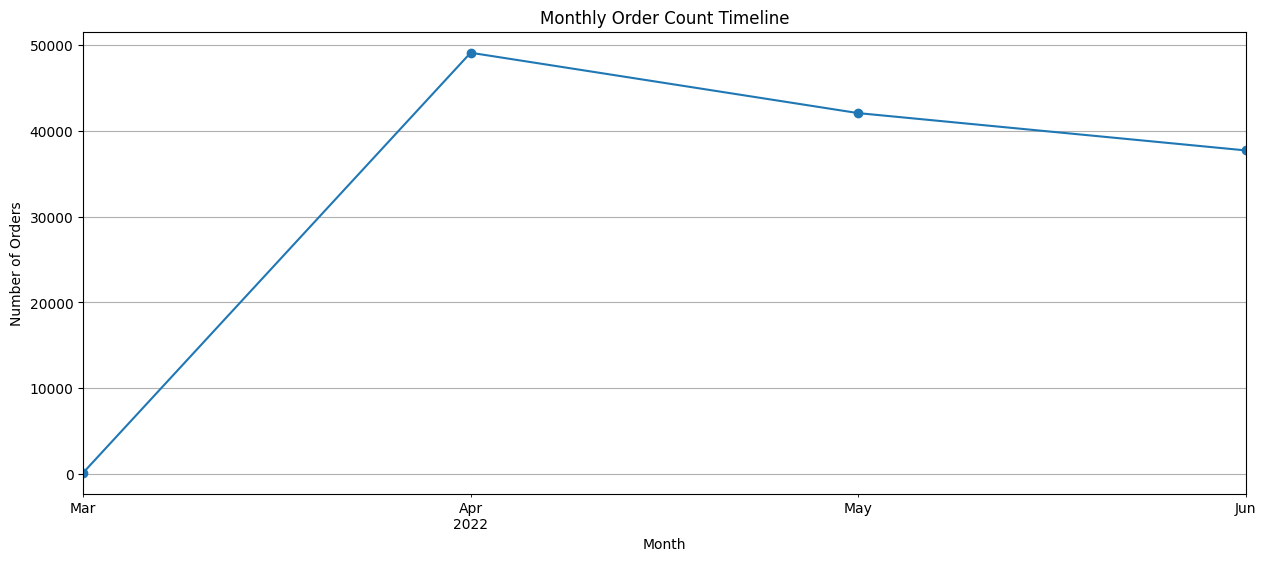

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

monthly_orders = df['Order ID'].resample('M').count()

plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Monthly Order Count Timeline')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['index', 'Order ID', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

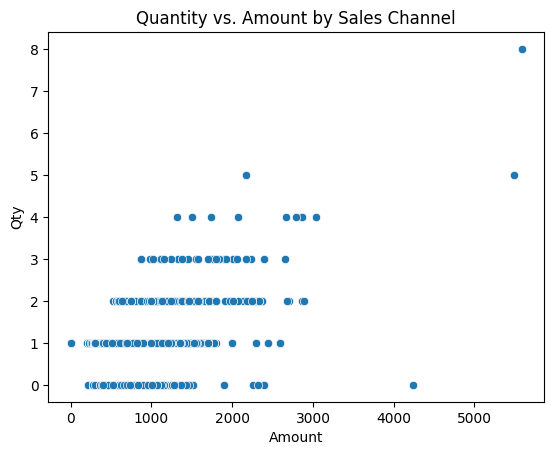

In [ ]:
sns.scatterplot(data=df, y='Qty', x='Amount')
plt.title('Quantity vs. Amount')
plt.show()

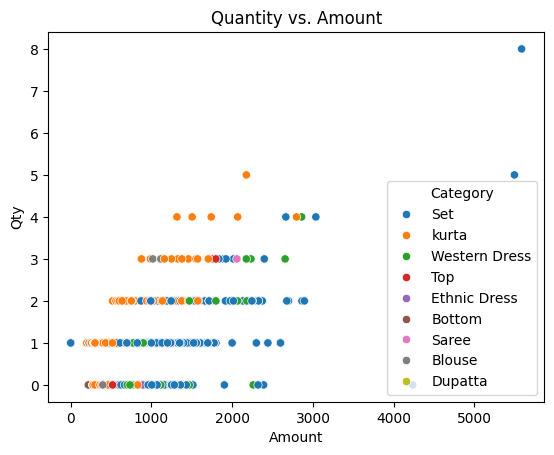

In [ ]:
sns.scatterplot(data=df, y='Qty', x='Amount',hue='Category',legend='auto')
plt.title('Quantity vs. Amount')
plt.show()

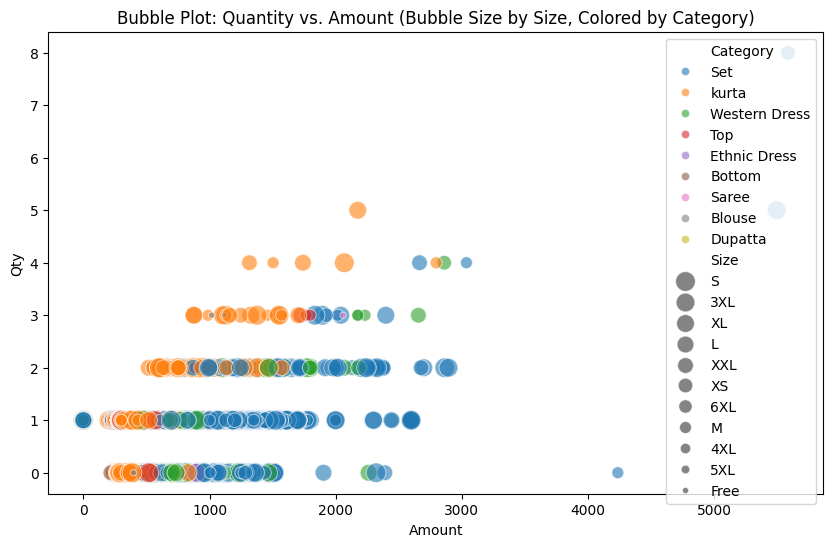

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Qty', x='Amount', size='Size', hue='Category', legend=True, alpha=0.6, sizes=(20, 200))
plt.title('Bubble Plot: Quantity vs. Amount (Bubble Size by Size, Colored by Category)')
plt.show()